In [74]:
import cv2
import numpy as np
from numpy.lib.stride_tricks import as_strided
import os
import matplotlib.pyplot as plt

In [75]:
a = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14],
              [15, 16, 17, 18, 19],
              [20, 21, 22, 23, 24]])

sub_shape = (3,3)
view_shape = tuple(np.subtract(a.shape, sub_shape) + 1) + sub_shape     
# 計算視野域(H', W', Hk, Wk) 
# H' = H - (K - 1)

strides = a.strides + a.strides

sub_matrices = as_strided(a,view_shape,strides)





In [76]:
dP = './img'
sP = './result'

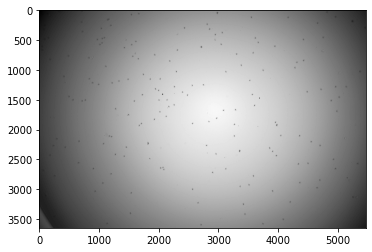

In [77]:
datalist = os.listdir(dP)
img_f = datalist[0]
image_org = cv2.imread(os.path.join(dP, img_f))
image = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

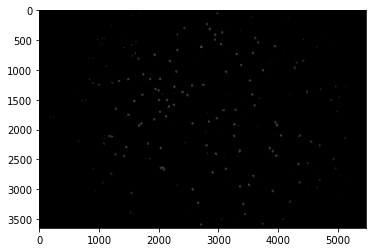

In [78]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
canny = cv2.Canny(blurred, 10, 30)
plt.imshow(canny, cmap='gray')

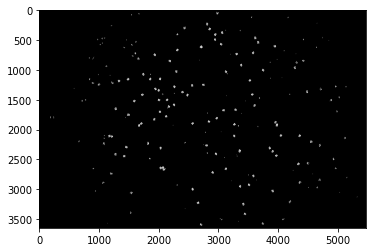

In [79]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(canny, kernel, iterations = 1)
plt.imshow(dilation, cmap='gray')

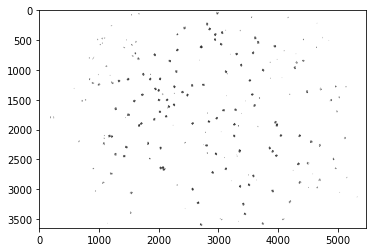

In [86]:
ret, bw_img = cv2.threshold(dilation, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bw_img, cmap='gray')